In [ ]:
%matplotlib inline
import pathlib
import cv2

# Importation de mes fonctions
from yolov5.chess.display_position_and_predict_moves import *
from yolov5.chess.corner_detection import *
from yolov5.chess.pieces_detection import *
from yolov5.chess.perspective_correction import *
from yolov5.chess.chess_position_utils import *
from yolov5.chess.convert_position_to_coordinates import *
from yolov5.chess.display_image_with_annotations import *

if __name__ == "__main__":
    # Etape 0 : 
    # Important de mettre ces lignes car les poids ont été obtenus sur Colab (Linux)
    # donc ne marche pas sur mon pc en local qui est Windows. D'où l'utilisation de ces lignes
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath

    model_weights_path = 'yolov5/models_weights/best_yolo_corner_detection.pt'
    img_path = "yolov5/board_exemple_mine.png"
    img = cv2.imread(img_path)
    
    # Etape 1 : Détection des 4 coins
    corner_boxes = find_corners_with_yolo(model_weights_path, img)
    corners = get_corner_coordinates_from_corner_boxes(corner_boxes)
    # Etape 2 : Détection des pièces d'échecs
    model_pieces_detection_weights_path = 'yolov5/models_weights/best_yolov5x_pieces_detection.pt'
    boxes = find_pieces_boxes(model_pieces_detection_weights_path, img_path)
    print('boxes ', boxes)
    # Etape 3 : Calculer les coordinates des pièces à partir de leur box 
    # (le milieu selon x, et le MEME milieu selon y)(il ne faut pas prendre le vrai milieu de la box car les pièces sont hautes mais pas larges)
    pieces_coordinates = []
    for box in boxes:
        
        delta = abs(box[2]-box[0])/2
        x = int(box[0] + delta)
        y = int(abs(box[3]- delta))
        # De la forme [x, y, proba, classe]
        pieces_coordinates.append([x, y, box[4], box[5]])
    
    # Etape 3 : Homographie
    output_size = 512   # Taille de l'image redressée (après transformation)
    # Redresser l'image et obtenir les nouvelles coordonnées des pièces
    image_redressee, new_pieces_coordinates, M = redresser_image(img, corners, pieces_coordinates, output_size)

    # Partie 4 : Choisir et tourner l'image dans le bon sens parmis les 4 possibilités (deux longues sous étapes)
    image_tournee, new_pieces_coordinates, center, angle = mettre_image_dans_le_bon_sens(image_redressee, new_pieces_coordinates, output_size)
    
    # Etape 5 : Déterminer les cases (h4...) des pièces sur l'échequier dans le bon sens
    pieces_positions = trouver_cases_pieces(new_pieces_coordinates, output_size)
    
    # Etape 6 : Conversion des cases en positions FEN pour être plus par Stockfish
    fen = coordinates_to_fen(pieces_positions)
    
    # Etape 6 : Visualisation d'un échequier virtuel
    ChessBoard = ChessPosition()
    ChessBoard.plot_chess_board()
    
    # Etape 7 : Prédiction du meilleur coup par Stockfish
    best_move_white, best_move_black = ChessBoard.get_best_moves()
    white_bar_height, black_bar_height = ChessBoard.get_evaluation_bars()

    # Etape 8 : Convertir cette position h4 en coordonnées sur l'image de base (annuler tous les changements de perspectives et rotation de l'image effectuées)
    coordonnees_best_moves = convert_best_moves_to_original_image_coordinates(best_move_white, best_move_black, center, angle, M, output_size)
    
    # Etape 9 : Afficher les coordonnées de ces meilleurs coups sur l'image originale
    #image_annotated = place_best_move_on_image(cv2.imread(img_path), coordonnees_best_moves["white"], coordonnees_best_moves["black"])
    image_annotated = display_everything_on_original_image(cv2.imread(img_path), corners, boxes, pieces_coordinates, coordonnees_best_moves, white_bar_height, black_bar_height, display_corners=True, display_boxes=False, display_coordinates=False, display_best_moves=True, display_evaluations=True, white_color=(255, 0, 0), black_color=(0, 0, 255))

    cv2.imshow("Image avec le déplacement", image_annotated)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

YOLOv5  v7.0-378-g2f74455a Python-3.10.5 torch-2.2.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
YOLOv5  v7.0-378-g2f74455a Python-3.10.5 torch-2.2.0+cu118 CPU

Fusing layers... 
Model summary: 322 layers, 86254162 parameters, 0 gradients, 204.0 GFLOPs
Adding AutoShape... 


boxes  [[     220.23      150.62      246.99      200.19     0.67796           9]
 [      104.3      288.02      141.85         343     0.66537           6]
 [     132.29      161.29      163.93      224.95     0.66036           7]
 [     324.59      257.58      358.68      359.41     0.59557           2]
 [     292.94      111.67      320.91      176.83      0.5589           8]
 [     166.66      279.78      196.37      331.78     0.43369          12]
 [     289.73      107.83      324.02      181.63     0.41705          11]
 [     220.69      270.72      251.69      326.38     0.40544          12]
 [     219.74      151.38      247.45      200.62     0.27504          12]]


FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

YOLOv5  v7.0-378-g2f74455a Python-3.10.5 torch-2.2.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
YOLOv5  v7.0-378-g2f74455a Python-3.10.5 torch-2.2.0+cu118 CPU

Fusing layers... 
Model summary: 322 layers, 86254162 parameters, 0 gradients, 204.0 GFLOPs
Adding AutoShape... 


[[     29.886      335.47      45.084      353.36      0.7009           0]
 [      363.6      332.81      380.65      351.93     0.63547           0]
 [      67.32       15.49      76.924      25.189     0.52586           0]
 [     310.89      16.503      323.46      34.029     0.42431           0]]
[[     283.46       190.1      304.36      232.47     0.87349           4]
 [      267.7      40.694      285.38      80.495     0.86675           4]
 [     75.514           0      97.959      45.242     0.86449          12]
 [      139.7      54.105      163.51      110.78     0.86255           9]
 [      68.37      55.604      91.365      111.19     0.86234           7]
 [     103.25      148.22      124.11      191.84     0.86218          10]
 [     52.952      174.58      79.255      230.14      0.8578           7]
 [     107.73      71.518      126.62         114     0.85693          10]
 [     271.84      74.084      290.38       116.4     0.85617           4]
 [     245.88      234.1

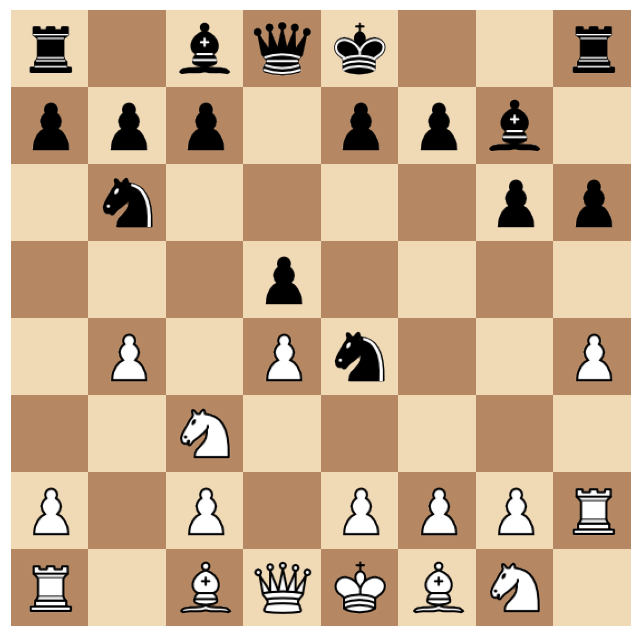

In [ ]:
%matplotlib inline
import pathlib
import cv2

# Importation de mes fonctions
from display_position_and_predict_moves import *
from corner_detection import *
from pieces_detection import *
from perspective_correction import *
from chess_position_utils import *
from convert_position_to_coordinates import *
from display_image_with_annotations import *
from predict import *

if __name__ == "__main__":
    # Etape 0 : 
    # Important de mettre ces lignes car les poids ont été obtenus sur Colab (Linux)
    # donc ne marche pas sur mon pc en local qui est Windows. D'où l'utilisation de ces lignes
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath

    model_weights_path = 'models/best_yolo_corner_detection.pt'
    img_path = "board_exemple_5.jpg"
    img = cv2.imread(img_path)
    
    # Etape 1 : Détection des 4 coins
    corner_boxes = find_corners_with_yolo(model_weights_path, img.copy())

    # Etape 2 : Détection des pièces d'échecs
    model_pieces_detection_weights_path = 'models/best_yolov5x_pieces_detection.pt'
    pieces_boxes = find_pieces_boxes(model_pieces_detection_weights_path, img_path)
    print(corner_boxes)
    print(pieces_boxes)
    image_annotated = compute_model_outputs_into_best_move(img.copy(), corner_boxes, pieces_boxes)
    
    cv2.imshow("Image avec le déplacement", image_annotated)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
# from yolov5.detect import run
# model_path = 'models/best_yolo_corner_detection.pt'
# img_path = "board_exemple_3.jpg"
# run(weights = model_path, source=img_path)

In [4]:
from yolov5.detect import run
model_path = 'models/best_yolo_corner_detection.pt'
img_path = "board_exemple_3.jpg"
run(weights = model_path, source=0)

YOLOv5  v7.0-378-g2f74455a Python-3.10.5 torch-2.2.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING  Environment does not support cv2.imshow() or PIL Image.show()



KeyboardInterrupt: 

In [ ]:
model_path = 'models/yolov5s.pt'
img_path = "board_exemple_3.jpg"

model = torch.hub.load(
        'yolov5', 'custom', path=model_path, source=0)
model.eval()
results = model([img_path])

# Extraire les coordonnées des bounding boxes
# Liste des bounding boxes sous forme [x, y, w, h]
corner_points = results.xywh[0].cpu().numpy()
print('Sortie !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ', corner_points)

AttributeError: 'int' object has no attribute 'lower'

In [ ]:
import argparse
import csv
import os
import platform
import sys
from pathlib import Path

import torch

FILE = Path(__file__).resolve()
ROOT = FILE.parents[0]  # YOLOv5 root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative
from ultralytics.utils.plotting import Annotator, colors, save_one_box

from yolov5.models.common import DetectMultiBackend
from yolov5.utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadScreenshots, LoadStreams
from yolov5.utils.general import (
    LOGGER,
    Profile,
    check_file,
    check_img_size,
    check_imshow,
    check_requirements,
    colorstr,
    cv2,
    increment_path,
    non_max_suppression,
    print_args,
    scale_boxes,
    strip_optimizer,
    xyxy2xywh,
)
from yolov5.utils.torch_utils import select_device, smart_inference_mode

In [ ]:
@smart_inference_mode()
def run(
    weights=ROOT / "yolov5s.pt",  # model path or triton URL
    source=ROOT / "data/images",  # file/dir/URL/glob/screen/0(webcam)
    data=ROOT / "data/coco128.yaml",  # dataset.yaml path
    imgsz=(640, 640),  # inference size (height, width)
    conf_thres=0.25,  # confidence threshold
    iou_thres=0.45,  # NMS IOU threshold
    max_det=1000,  # maximum detections per image
    device="",  # cuda device, i.e. 0 or 0,1,2,3 or cpu
    view_img=False,  # show results
    save_txt=False,  # save results to *.txt
    save_format=0,  # save boxes coordinates in YOLO format or Pascal-VOC format (0 for YOLO and 1 for Pascal-VOC)
    save_csv=False,  # save results in CSV format
    save_conf=False,  # save confidences in --save-txt labels
    save_crop=False,  # save cropped prediction boxes
    nosave=False,  # do not save images/videos
    classes=None,  # filter by class: --class 0, or --class 0 2 3
    agnostic_nms=False,  # class-agnostic NMS
    augment=False,  # augmented inference
    visualize=False,  # visualize features
    update=False,  # update all models
    project=ROOT / "runs/detect",  # save results to project/name
    name="exp",  # save results to project/name
    exist_ok=False,  # existing project/name ok, do not increment
    line_thickness=3,  # bounding box thickness (pixels)
    hide_labels=False,  # hide labels
    hide_conf=False,  # hide confidences
    half=False,  # use FP16 half-precision inference
    dnn=False,  # use OpenCV DNN for ONNX inference
    vid_stride=1,  # video frame-rate stride
):
    """
    Runs YOLOv5 detection inference on various sources like images, videos, directories, streams, etc.

    Args:
        weights (str | Path): Path to the model weights file or a Triton URL. Default is 'yolov5s.pt'.
        source (str | Path): Input source, which can be a file, directory, URL, glob pattern, screen capture, or webcam
            index. Default is 'data/images'.
        data (str | Path): Path to the dataset YAML file. Default is 'data/coco128.yaml'.
        imgsz (tuple[int, int]): Inference image size as a tuple (height, width). Default is (640, 640).
        conf_thres (float): Confidence threshold for detections. Default is 0.25.
        iou_thres (float): Intersection Over Union (IOU) threshold for non-max suppression. Default is 0.45.
        max_det (int): Maximum number of detections per image. Default is 1000.
        device (str): CUDA device identifier (e.g., '0' or '0,1,2,3') or 'cpu'. Default is an empty string, which uses the
            best available device.
        view_img (bool): If True, display inference results using OpenCV. Default is False.
        save_txt (bool): If True, save results in a text file. Default is False.
        save_csv (bool): If True, save results in a CSV file. Default is False.
        save_conf (bool): If True, include confidence scores in the saved results. Default is False.
        save_crop (bool): If True, save cropped prediction boxes. Default is False.
        nosave (bool): If True, do not save inference images or videos. Default is False.
        classes (list[int]): List of class indices to filter detections by. Default is None.
        agnostic_nms (bool): If True, perform class-agnostic non-max suppression. Default is False.
        augment (bool): If True, use augmented inference. Default is False.
        visualize (bool): If True, visualize feature maps. Default is False.
        update (bool): If True, update all models' weights. Default is False.
        project (str | Path): Directory to save results. Default is 'runs/detect'.
        name (str): Name of the current experiment; used to create a subdirectory within 'project'. Default is 'exp'.
        exist_ok (bool): If True, existing directories with the same name are reused instead of being incremented. Default is
            False.
        line_thickness (int): Thickness of bounding box lines in pixels. Default is 3.
        hide_labels (bool): If True, do not display labels on bounding boxes. Default is False.
        hide_conf (bool): If True, do not display confidence scores on bounding boxes. Default is False.
        half (bool): If True, use FP16 half-precision inference. Default is False.
        dnn (bool): If True, use OpenCV DNN backend for ONNX inference. Default is False.
        vid_stride (int): Stride for processing video frames, to skip frames between processing. Default is 1.

    Returns:
        None

    Examples:
        ```python
        from ultralytics import run

        # Run inference on an image
        run(source='data/images/example.jpg', weights='yolov5s.pt', device='0')

        # Run inference on a video with specific confidence threshold
        run(source='data/videos/example.mp4', weights='yolov5s.pt', conf_thres=0.4, device='0')
        ```
    """
    source = str(source)
    save_img = not nosave and not source.endswith(".txt")  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(("rtsp://", "rtmp://", "http://", "https://"))
    webcam = source.isnumeric() or source.endswith(".streams") or (is_url and not is_file)
    screenshot = source.lower().startswith("screen")
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / "labels" if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Dataloader
    bs = 1  # batch_size
    if webcam:
        view_img = check_imshow(warn=True)
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt, vid_stride=vid_stride)
        bs = len(dataset)
    elif screenshot:
        dataset = LoadScreenshots(source, img_size=imgsz, stride=stride, auto=pt)
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt, vid_stride=vid_stride)
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    model.warmup(imgsz=(1 if pt or model.triton else bs, 3, *imgsz))  # warmup
    seen, windows, dt = 0, [], (Profile(device=device), Profile(device=device), Profile(device=device))
    for path, im, im0s, vid_cap, s in dataset:
        with dt[0]:
            im = torch.from_numpy(im).to(model.device)
            im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32
            im /= 255  # 0 - 255 to 0.0 - 1.0
            if len(im.shape) == 3:
                im = im[None]  # expand for batch dim
            if model.xml and im.shape[0] > 1:
                ims = torch.chunk(im, im.shape[0], 0)

        # Inference
        with dt[1]:
            visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
            if model.xml and im.shape[0] > 1:
                pred = None
                for image in ims:
                    if pred is None:
                        pred = model(image, augment=augment, visualize=visualize).unsqueeze(0)
                    else:
                        pred = torch.cat((pred, model(image, augment=augment, visualize=visualize).unsqueeze(0)), dim=0)
                pred = [pred, None]
            else:
                pred = model(im, augment=augment, visualize=visualize)
        # NMS
        with dt[2]:
            pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Define the path for the CSV file
        csv_path = save_dir / "predictions.csv"

        # Create or append to the CSV file
        def write_to_csv(image_name, prediction, confidence):
            """Writes prediction data for an image to a CSV file, appending if the file exists."""
            data = {"Image Name": image_name, "Prediction": prediction, "Confidence": confidence}
            with open(csv_path, mode="a", newline="") as f:
                writer = csv.DictWriter(f, fieldnames=data.keys())
                if not csv_path.is_file():
                    writer.writeheader()
                writer.writerow(data)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f"{i}: "
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, "frame", 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / "labels" / p.stem) + ("" if dataset.mode == "image" else f"_{frame}")  # im.txt
            s += "{:g}x{:g} ".format(*im.shape[2:])  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_boxes(im.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, 5].unique():
                    n = (det[:, 5] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

                # Write results
                for *xyxy, conf, cls in reversed(det):
                    c = int(cls)  # integer class
                    label = names[c] if hide_conf else f"{names[c]}"
                    confidence = float(conf)
                    confidence_str = f"{confidence:.2f}"

                    if save_csv:
                        write_to_csv(p.name, label, confidence_str)

                    if save_txt:  # Write to file
                        if save_format == 0:
                            coords = (
                                (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()
                            )  # normalized xywh
                        else:
                            coords = (torch.tensor(xyxy).view(1, 4) / gn).view(-1).tolist()  # xyxy
                        line = (cls, *coords, conf) if save_conf else (cls, *coords)  # label format
                        with open(f"{txt_path}.txt", "a") as f:
                            f.write(("%g " * len(line)).rstrip() % line + "\n")

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f"{names[c]} {conf:.2f}")
                        annotator.box_label(xyxy, label, color=colors(c, True))
                    if save_crop:
                        save_one_box(xyxy, imc, file=save_dir / "crops" / names[c] / f"{p.stem}.jpg", BGR=True)

            # Stream results
            im0 = annotator.result()
            if view_img:
                if platform.system() == "Linux" and p not in windows:
                    windows.append(p)
                    cv2.namedWindow(str(p), cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)  # allow window resize (Linux)
                    cv2.resizeWindow(str(p), im0.shape[1], im0.shape[0])
                cv2.imshow(str(p), im0)
                cv2.waitKey(1)  # 1 millisecond

            # Save results (image with detections)
            if save_img:
                if dataset.mode == "image":
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                        save_path = str(Path(save_path).with_suffix(".mp4"))  # force *.mp4 suffix on results videos
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))
                    vid_writer[i].write(im0)

        # Print time (inference-only)
        LOGGER.info(f"{s}{'' if len(det) else '(no detections), '}{dt[1].dt * 1E3:.1f}ms")

    # Print results
    t = tuple(x.t / seen * 1e3 for x in dt)  # speeds per image
    LOGGER.info(f"Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}" % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ""
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights[0])  # update model (to fix SourceChangeWarning)

In [ ]:
from yolov5.detect import run
model_path = 'models/best_yolo_corner_detection.pt'
img_path = "board_exemple_3.jpg"
run(weights = model_path, source=0)